In [ ]:
import os
import requests

#get pdf doc path

pdf_path = "human-nutrition-text.pdf"


#download file

if not os.path.exists(pdf_path):
  print(f"[INFO] File doesnt exist, downloading...")

  # URL of pdf
  url = "https://pressbooks.oer.hawaii.edu/humannutrition2/open/download?type=pdf"

  # file name when downloaded
  filename = pdf_path

  # sending request to url to download file
  response = requests.get(url)

  #checking the  status of request
  if response.status_code == 200:
    #open file and save it
    with open(filename, "wb") as file:
      file.write(response.content)
    print(f"[INFO] The file is downloaded and save as {filename}")
  else:
    print(f"[INFO] Failed to download the file. Status code: {response.status_code}")

else:
  print(f"File {pdf_path} exists")




[INFO] File doesnt exist, downloading...
[INFO] The file is downloaded and save as human-nutrition-text.pdf


###Calculating the no. of tokens in PDF.

Opening the PDF.

In [ ]:
!pip install PyMuPDF
import fitz
from tqdm.auto import tqdm #pip install  tqdm

def text_formatter(text: str) -> str:
  """ Performs minor formatting on text."""
  cleaned_text = text.replace("\n"," ").strip()

  #more text formatting func can be used here

  return cleaned_text

def open_and_read_pdf(pdf_path: str) -> list[dict]:
  doc = fitz.open(pdf_path)
  pages_and_texts = []
  for page_number, page in tqdm(enumerate(doc)):
    text = page.get_text()
    text = text_formatter(text=text)
    pages_and_texts.append({"page_number": page_number - 41,
                            "page_char_count": len(text),
                            "page_word_count": len(text.split(" ")),
                            "page_sentence_count_raw": len(text.split(".")),
                            "page_token_count": len(text) / 4, # 1 token  = ~4 characters
                            "text": text})

  return pages_and_texts

pages_and_texts = open_and_read_pdf(pdf_path=pdf_path)
pages_and_texts[:4]



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 38.4 MB/s eta 0:00:00


0it [00:00, ?it/s]

[{'page_number': -41,
  'page_char_count': 29,
  'page_word_count': 4,
  'page_sentence_count_raw': 1,
  'page_token_count': 7.25,
  'text': 'Human Nutrition: 2020 Edition'},
 {'page_number': -40,
  'page_char_count': 0,
  'page_word_count': 1,
  'page_sentence_count_raw': 1,
  'page_token_count': 0.0,
  'text': ''},
 {'page_number': -39,
  'page_char_count': 320,
  'page_word_count': 54,
  'page_sentence_count_raw': 1,
  'page_token_count': 80.0,
  'text': 'Human Nutrition: 2020  Edition  UNIVERSITY OF HAWAI‘I AT MĀNOA  FOOD SCIENCE AND HUMAN  NUTRITION PROGRAM  ALAN TITCHENAL, SKYLAR HARA,  NOEMI ARCEO CAACBAY, WILLIAM  MEINKE-LAU, YA-YUN YANG, MARIE  KAINOA FIALKOWSKI REVILLA,  JENNIFER DRAPER, GEMADY  LANGFELDER, CHERYL GIBBY, CHYNA  NICOLE CHUN, AND ALLISON  CALABRESE'},
 {'page_number': -38,
  'page_char_count': 212,
  'page_word_count': 32,
  'page_sentence_count_raw': 3,
  'page_token_count': 53.0,
  'text': 'Human Nutrition: 2020 Edition by University of Hawai‘i at Mānoa Food 

In [ ]:
import random

random.sample(pages_and_texts, k=3)

[{'page_number': 1007,
  'page_char_count': 1796,
  'page_word_count': 274,
  'page_sentence_count_raw': 22,
  'page_token_count': 449.0,
  'text': 'Pesticides  Pesticides are important in food production to control diseases,  insects, and other pests. They protect crops and ensure a large  yield. However, synthetic pesticides can leave behind residues,  particularly on produce, that can be harmful to human health. Foods  that contain the highest levels of pesticide residue include  conventionally-grown peaches, apples, bell peppers, celery,  nectarines, strawberries, cherries, pears, spinach, lettuce, and  potatoes. Foods that contain the lowest levels of pesticide residue  include avocados, pineapples, bananas, mangoes, asparagus,  cabbage, and broccoli.7 In many cases, the amount of pesticide  exposure is too small to pose a risk. However, harmful exposures  can lead to certain health problems and complications, including  cancer. Also, infants and young children are more susceptibl

In [ ]:
import pandas as pd

df = pd.DataFrame(pages_and_texts)
df.head()

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,text
0,-41,29,4,1,7.25,Human Nutrition: 2020 Edition
1,-40,0,1,1,0.00,
2,-39,320,54,1,80.00,Human Nutrition: 2020 Edition UNIVERSITY OF ...
3,-38,212,32,3,53.00,Human Nutrition: 2020 Edition by University of...
4,-37,797,145,3,199.25,Contents Preface University of Hawai‘i at Mā...


In [ ]:
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count
count,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.59,198.89,14.18,287.15
std,348.86,560.44,95.75,9.54,140.11
min,-41.00,0.00,1.00,1.00,0.00
25%,260.75,762.75,134.00,8.00,190.69
50%,562.50,1232.50,215.00,13.00,308.12
75%,864.25,1605.25,271.25,19.00,401.31
max,1166.00,2308.00,429.00,82.00,577.00


sentence-transformers 'all-mpnet-base-v2', see: https://sbert.net/docs/pretrained_models.html

### Further text processing (splitting pages into sentences)

2 ways to do this:
1. splitting by "."
2. using NLP lib such as spaCy (https://spacy.io/usage) and nltk (https://www.nltk.org/).


In [ ]:
from spacy.lang.en import English

nlp = English()

# Add a sentencizer pipeline  -- turning texts into sentences
nlp.add_pipe("sentencizer")

#create document instance as an example

doc = nlp("This is a sentence. This is another sentence. I like elephant.")
assert len(list(doc.sents)) == 3

#print out ur sentences split
list(doc.sents)



[This is a sentence., This is another sentence., I like elephant.]

In [ ]:
pages_and_texts[600]

{'page_number': 559,
 'page_char_count': 864,
 'page_word_count': 137,
 'page_sentence_count_raw': 16,
 'page_token_count': 216.0,
 'text': 'Image by  Allison  Calabrese /  CC BY 4.0  Korsakoff syndrome can cause similar symptoms as beriberi such  as confusion, loss of coordination, vision changes, hallucinations,  and may progress to coma and death. This condition is specific  to alcoholics as diets high in alcohol can cause thiamin deficiency.  Other individuals at risk include individuals who also consume diets  typically low in micronutrients such as those with eating disorders,  elderly, and individuals who have gone through gastric bypass  surgery.5  Figure 9.10 The Role of Thiamin  Figure 9.11 Beriberi, Thiamin Deficiency  5.\xa0Fact Sheets for Health Professionals: Thiamin. National  Institute of Health, Office of Dietary Supplements.  \xa0https:/ /ods.od.nih.gov/factsheets/Thiamin- HealthProfessional/. Updated Feburary 11, 2016.  Accessed October 22, 2017.  Water-Soluble Vitam

In [ ]:
for item in tqdm(pages_and_texts):
  item["sentences"] = list(nlp(item["text"]).sents)

  #make sure all sentences are stringd (the default type is a spaCy datatype)
  item["sentences"] = [str(sentence) for sentence in item["sentences"]]

  #count the sentences
  item["page_sentence_count_spacy"] = len(item["sentences"])


  0%|          | 0/1208 [00:00<?, ?it/s]

In [ ]:
random.sample(pages_and_texts, k=3)

[{'page_number': 536,
  'page_char_count': 1448,
  'page_word_count': 287,
  'page_sentence_count_raw': 23,
  'page_token_count': 362.0,
  'text': 'Food  Serving Vitamin  D (IU)  Percent  Daily Value  Swordfish  3 oz.  566  142  Salmon  3 oz.  447  112  Tuna fish, canned in water, drained  3 oz.  154  39  Orange juice fortified with vitamin D  1 c.  137  34  Milk, nonfat, reduced fat, and whole,  vitamin D- fortified  1 c.  115-124  29-31  Margarine, fortified  1 tbsp.  60  15  Sardines, canned in oil, drained  2 e.  46  12  Beef liver  3 oz.  42  11  Egg, large  1 e.  41  10  Source: Dietary Supplement Fact Sheet: Vitamin D. National  Institutes  of  Health,  Office  of  Dietary  Supplements.https:/ /ods.od.nih.gov/factsheets/VitaminD- HealthProfessional/#h3. Updated \xa0September 5, 2012. Accessed  October 22, 2017.  Vitamin E Functions and Health Benefits  Vitamin E occurs in eight chemical forms, of which alpha- tocopherol appears to be the only form that is recognized to meet  hum

In [ ]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.59,198.89,14.18,287.15,10.32
std,348.86,560.44,95.75,9.54,140.11,6.30
min,-41.00,0.00,1.00,1.00,0.00,0.00
25%,260.75,762.75,134.00,8.00,190.69,5.00
50%,562.50,1232.50,215.00,13.00,308.12,10.00
75%,864.25,1605.25,271.25,19.00,401.31,15.00
max,1166.00,2308.00,429.00,82.00,577.00,28.00



  ### chunking the sentences together

  also called text splitting. No 100% correct way to do this.

  trying with group of 10 sentences. Can also try with other group no.

  LangChain can also be used for textsplitting.


  doing this for:
  1. easier to filter smaller texts,
  2. text chunks can fit into embedding model window (e.g. 384 tokens as a limit)
  3. tokens passed to LLM will be more specific and focused.

In [ ]:
# defining split size to turn grups of sentences into chunks

num_sentence_chunk_size = 10


#creating a func, to split lists of texts recursively into chunk size
# e.g. 20 -> [10, 10] or [25] -> [10, 10, 5]
def split_list(input_list: list[str],
                slice_size: int=num_sentence_chunk_size) -> list[list[str]]:
    return [input_list[i:i+slice_size] for i in range(0, len(input_list), slice_size)]

test_list = list(range(25))
split_list(test_list)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24]]

In [ ]:
# Looping through pages and texts and split sentences into chunks

for item in tqdm(pages_and_texts):
  item["sentence_chunks"] = split_list(input_list=item["sentences"],
                                        slice_size=num_sentence_chunk_size)
  item["num_chunks"] = len(item["sentence_chunks"])

  0%|          | 0/1208 [00:00<?, ?it/s]

In [ ]:
random.sample(pages_and_texts, k=3)

[{'page_number': 712,
  'page_char_count': 1834,
  'page_word_count': 340,
  'page_sentence_count_raw': 19,
  'page_token_count': 458.5,
  'text': 'EAR values become the scientific foundation upon which RDA  values are set.  2. Recommended Daily Allowances. Once the EAR of a nutrient  has been established, the RDA can be mathematically  determined. While the EAR is set at a point that meets the  needs of half the population, RDA values are set to meet the  needs of the vast majority (97 to 98 percent) of the target  healthy population. It is important to note that RDAs are not  the same thing as individual nutritional requirements. The  actual nutrient needs of a given individual will be different  than the RDA. However, since we know that 97 to 98 percent of  the population’s needs are met by the RDA, we can assume that  if a person is consuming the RDA of a given nutrient, they are  most likely meeting their nutritional need for that nutrient.  The important thing to remember is that

In [ ]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy,num_chunks
count,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00,1208.00
mean,562.50,1148.59,198.89,14.18,287.15,10.32,1.53
std,348.86,560.44,95.75,9.54,140.11,6.30,0.64
min,-41.00,0.00,1.00,1.00,0.00,0.00,0.00
25%,260.75,762.75,134.00,8.00,190.69,5.00,1.00
50%,562.50,1232.50,215.00,13.00,308.12,10.00,1.00
75%,864.25,1605.25,271.25,19.00,401.31,15.00,2.00
max,1166.00,2308.00,429.00,82.00,577.00,28.00,3.00


### Splitting each chunk into its own item
This will give good level of granularity
we can dive specifically into the text sample that was used in our model


In [ ]:
import re

#split each chunk into its own item
pages_and_chunks = []
for item in tqdm(pages_and_texts):
  for sentence_chunk in item["sentence_chunks"]:
    chunk_dict = {}
    chunk_dict["page_number"] = item["page_number"]

    # join the sentences together into a paragraph structure, aka join the list of sentences into one paragraph
    joined_sentence_chunk = "".join(sentence_chunk).replace("  "," ").strip() # this is experimental to replace based on the data working on.
    joined_sentence_chunk = re.sub(r'\.([A-Z])', r'. \1', joined_sentence_chunk) # ".A" --> ". A"

    chunk_dict["sentence_chunk"] = joined_sentence_chunk

    #Get some stats on the chunks
    chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)
    chunk_dict["chunk_word_count"] = len([word for word in joined_sentence_chunk.split(" ")])
    chunk_dict["chunk_token_count"] = len(joined_sentence_chunk) / 4 # 1 token = ~4 chars

    pages_and_chunks.append(chunk_dict)

len(pages_and_chunks)





  0%|          | 0/1208 [00:00<?, ?it/s]

1843

In [ ]:
random.sample(pages_and_chunks, k=1)

[{'page_number': 655,
  'sentence_chunk': 'Figure 11.2 The Structure of Hemoglobin Iron | 655',
  'chunk_char_count': 50,
  'chunk_word_count': 9,
  'chunk_token_count': 12.5}]

In [ ]:
df = pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,1843.00,1843.00,1843.00,1843.00
mean,583.38,734.83,112.72,183.71
std,347.79,447.43,71.07,111.86
min,-41.00,12.00,3.00,3.00
25%,280.50,315.00,45.00,78.75
50%,586.00,746.00,114.00,186.50
75%,890.00,1118.50,173.00,279.62
max,1166.00,1831.00,297.00,457.75


embedding model has max token capacity of 384, and we have 457 in total chunk count. We will loose some information.

In [ ]:
# df.iloc[40:44, 1:2]
df.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count
0,-41,Human Nutrition: 2020 Edition,29,4,7.25
1,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.00
2,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.50
3,-37,Contents Preface University of Hawai‘i at Māno...,766,114,191.50
4,-36,Lifestyles and Nutrition University of Hawai‘i...,941,142,235.25


### Filter chunks of text for short chunks
These chunks may not be having much useful information.

In [ ]:
# show random chunks with under 30 tokens in legnth
min_token_length = 30
for row in df[df["chunk_token_count"] <= min_token_length].sample(5).iterrows():
  print(f'Chunk token count: {row[1]["chunk_token_count"]} | Text: {row[1]["sentence_chunk"]} | Page_Number: {row[1]["page_number"]}')


Chunk token count: 20.75 | Text: http:/ /pressbooks.oer.hawaii.edu/ humannutrition2/?p=118   132 | The Immune System | Page_Number: 132
Chunk token count: 24.75 | Text: Free radical reactions can continue unchecked unless stopped by a defense mechanism. The Atom | 461 | Page_Number: 461
Chunk token count: 21.0 | Text: http:/ /pressbooks.oer.hawaii.edu/ humannutrition2/?p=283   Alcohol Metabolism | 441 | Page_Number: 441
Chunk token count: 3.0 | Text: 184 | Sodium | Page_Number: 184
Chunk token count: 25.25 | Text: The Polynesian Family System in Ka-‘u. Rutland, Vermont: Charles E. Tuttle Company 780 | Introduction | Page_Number: 780


In [ ]:
# Filtering the DataFrame for rows with under 30 tokens
pages_and_chunks_over_min_token_len = df[df["chunk_token_count"] > min_token_length].to_dict(orient="records")
pages_and_chunks_over_min_token_len[:2]

[{'page_number': -39,
  'sentence_chunk': 'Human Nutrition: 2020 Edition UNIVERSITY OF HAWAI‘I AT MĀNOA FOOD SCIENCE AND HUMAN NUTRITION PROGRAM ALAN TITCHENAL, SKYLAR HARA, NOEMI ARCEO CAACBAY, WILLIAM MEINKE-LAU, YA-YUN YANG, MARIE KAINOA FIALKOWSKI REVILLA, JENNIFER DRAPER, GEMADY LANGFELDER, CHERYL GIBBY, CHYNA NICOLE CHUN, AND ALLISON CALABRESE',
  'chunk_char_count': 308,
  'chunk_word_count': 42,
  'chunk_token_count': 77.0},
 {'page_number': -38,
  'sentence_chunk': 'Human Nutrition: 2020 Edition by University of Hawai‘i at Mānoa Food Science and Human Nutrition Program is licensed under a Creative Commons Attribution 4.0 International License, except where otherwise noted.',
  'chunk_char_count': 210,
  'chunk_word_count': 30,
  'chunk_token_count': 52.5}]

In [ ]:
random.sample(pages_and_chunks_over_min_token_len, k=1)

[{'page_number': -15,
  'sentence_chunk': 'Jennifer Draper is a Lecturer in the Department of Human Nutrition, Food and Animal Sciences. She received her MA in Nutrition Science from the University of Texas at Austin.\xa0She is a Registered Dietitian in private practice specializing in eating disorders and emotional over-eating.\xa0She enjoys interacting with students and is passionate about helping people have a healthy relationship with food and their bodies. Marie Kainoa Fialkowski Revilla Marie Kainoa Fialkowski Revilla is a Native Hawaiian faculty member in the Department of Human Nutrition, Food, and Animal Sciences at the University of Hawai‘i at Mānoa. She teaches a number of courses in nutrition both face to face and online. She is dedicated to developing readily available and accessible nutrition education materials and curricula that reflect Hawai‘i and the Pacific to ensure that her students can relate to the content being learned. She enjoys spending time with her ‘ohana (

### Embedding the text chunks

embeddings are broad but powerful concepts.
While humans understand text, machines understand numbers.
What is likable to do:
--turn the text chunks into numbers, specifically embeddings,
a useful numerical representation.
The best part about embeddings is that are a learned representation.

...

the == 0

a == 1

...


for a great resource on embedding => https://vickiboykis.com/what_are_embeddings/

In [ ]:
""" good resource for embedding is sentence_transformers"""

""" can also check other embedding models on the leaderboard of hugging-face"""
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer(model_name_or_path = "all-mpnet-base-v2", #also could do mini version, which is faster
                                      device="cpu")
# create a list of sentences
sentences = ["The sentence transformer library an easy way to create embeddings.",
             "Sentences can be embedded one by one or in a list.",
             "I like whales!"]

# Sentences are encoded /embedded by calling model.encode()
embeddings = embedding_model.encode(sentences)
embedding_dict = dict(zip(sentences, embeddings))

#see the embeddings
for sentence, embedding in embedding_dict.items():
  print(f"Sentence: {sentence}")
  print(f"Embedding:{embedding}")
  print("")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 2.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Sentence: The sentence transformer library an easy way to create embeddings.
Embedding:[-1.14774909e-02  4.80060391e-02 -2.67635956e-02  5.12825847e-02
 -1.06590027e-02 -1.26747368e-02  1.74668953e-02 -5.47722466e-02
 -7.71108363e-03 -1.00227650e-02  3.03896777e-02  3.20656262e-02
 -2.91221961e-02  2.35198308e-02  3.53032239e-02 -8.02602991e-02
  5.38373441e-02  1.06634723e-03 -1.16086788e-02  1.93269346e-02
  2.80979946e-02  2.33001560e-02  1.20223733e-02  4.35640477e-02
 -2.66580712e-02 -3.24715003e-02  1.38751855e-02 -3.27538662e-02
  5.80072887e-02  3.96831520e-03 -3.35530005e-02  6.16928283e-03
  3.02580148e-02  9.07890848e-04  1.04716423e-06  3.50171351e-03
 -1.32224262e-02 -1.06888711e-02  9.31983814e-03 -1.24077045e-03
  5.88111579e-02 -6.18662275e-02  1.65629014e-02  4.04745005e-02
 -4.60743234e-02 -1.86614729e-02  4.14295681e-02  1.73219293e-02
  8.49296078e-02  6.74026459e-02 -1.95336845e-02 -5.57684265e-02
 -4.04142216e-03 -3.22136022e-02 -1.56605453e-03  2.59360690e-02
 -2

* the embedding model has taken the sentences and converted into numbers, in high dimensional space.*

In [ ]:
embeddings[0].shape

(768,)

In [ ]:
embedding = embedding_model.encode("My favourite animal is the cow!")
embedding

array([-1.45473834e-02,  7.66726956e-02, -2.85872258e-02, -3.31283063e-02,
        3.65210213e-02,  4.78570424e-02, -7.08107948e-02,  1.62834004e-02,
        1.93443689e-02, -2.80482266e-02, -2.91747209e-02,  5.11309654e-02,
       -3.28720324e-02, -8.98755714e-03, -1.03672966e-02, -3.15488502e-02,
        4.22783755e-02, -9.13285278e-03, -1.94017198e-02,  4.35689613e-02,
       -2.31998134e-02,  4.29883078e-02, -1.72393341e-02, -2.01372430e-02,
       -3.13574113e-02,  8.08165129e-03, -2.06725020e-02, -2.27869749e-02,
        2.44812425e-02,  1.71968192e-02, -6.26672879e-02, -7.54797533e-02,
        3.57421599e-02, -5.46570029e-03,  1.24730320e-06, -7.63198826e-03,
       -3.53221968e-02,  1.91327017e-02,  3.99045721e-02,  2.11737561e-03,
        1.64565910e-02,  9.84057318e-03, -1.80701055e-02,  9.33837332e-03,
        3.23482789e-02,  5.84785417e-02,  4.23187092e-02,  1.62091255e-02,
       -9.14910734e-02,  1.82305351e-02, -5.25730150e-03, -7.81022478e-03,
       -3.47644649e-02, -

In [ ]:
%%time

# embedding_model.to("cpu")

# #embed each chunk one by one
# for item in tqdm(pages_and_chunks_over_min_token_len):
#   item["embedding"] = embedding_model.encode(item["sentence_chunk"])


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


In [ ]:

%%time

# embedding_model.to("cuda")

for item in tqdm(pages_and_chunks_over_min_token_len):
  item["embedding"] = embedding_model.encode(item["sentence_chunk"])

  0%|          | 0/1680 [00:00<?, ?it/s]

CPU times: user 18min 39s, sys: 4.87 s, total: 18min 44s
Wall time: 19min 6s


In [ ]:
%%time

text_chunks=[item["sentence_chunk"] for item in pages_and_chunks_over_min_token_len]
text_chunks[419]

CPU times: user 726 µs, sys: 0 ns, total: 726 µs
Wall time: 733 µs


'often. • Calm your “sweet tooth” by eating fruits, such as berries or an apple. • Replace sugary soft drinks with seltzer water, tea, or a small amount of 100 percent fruit juice added to water or soda water. The Food Industry: Functional Attributes of Carbohydrates and the Use of Sugar Substitutes In the food industry, both fast-releasing and slow-releasing carbohydrates are utilized to give foods a wide spectrum of functional attributes, including increased sweetness, viscosity, bulk, coating ability, solubility, consistency, texture, body, and browning capacity. The differences in chemical structure between the different carbohydrates confer their varied functional uses in foods. Starches, gums, and pectins are used as thickening agents in making jam, cakes, cookies, noodles, canned products, imitation cheeses, and a variety of other foods. Molecular gastronomists use slow- releasing carbohydrates, such as alginate, to give shape and texture to their fascinating food creations. Add

In [ ]:
len(text_chunks)

1680

In [ ]:
%%time

#embed all text in batches
text_chunks_embedding = embedding_model.encode(text_chunks,
                                               batch_size=32, #can be experimented to decide which batch size will be best
                                               convert_to_tensor=True)
text_chunks_embedding

CPU times: user 21min 2s, sys: 4min 10s, total: 25min 13s
Wall time: 25min 30s


tensor([[ 0.0674,  0.0902, -0.0051,  ..., -0.0221, -0.0232,  0.0126],
        [ 0.0552,  0.0592, -0.0166,  ..., -0.0120, -0.0103,  0.0227],
        [ 0.0280,  0.0340, -0.0206,  ..., -0.0054,  0.0213,  0.0313],
        ...,
        [ 0.0771,  0.0098, -0.0122,  ..., -0.0409, -0.0752, -0.0241],
        [ 0.1030, -0.0165,  0.0083,  ..., -0.0574, -0.0283, -0.0295],
        [ 0.0864, -0.0125, -0.0113,  ..., -0.0522, -0.0337, -0.0299]])

###Saving embeddings to file

In [ ]:
pages_and_chunks_over_min_token_len[419]

{'page_number': 277,
 'sentence_chunk': 'often. • Calm your “sweet tooth” by eating fruits, such as berries or an apple. • Replace sugary soft drinks with seltzer water, tea, or a small amount of 100 percent fruit juice added to water or soda water. The Food Industry: Functional Attributes of Carbohydrates and the Use of Sugar Substitutes In the food industry, both fast-releasing and slow-releasing carbohydrates are utilized to give foods a wide spectrum of functional attributes, including increased sweetness, viscosity, bulk, coating ability, solubility, consistency, texture, body, and browning capacity. The differences in chemical structure between the different carbohydrates confer their varied functional uses in foods. Starches, gums, and pectins are used as thickening agents in making jam, cakes, cookies, noodles, canned products, imitation cheeses, and a variety of other foods. Molecular gastronomists use slow- releasing carbohydrates, such as alginate, to give shape and texture 

In [ ]:
text_chunks_embeddings_df = pd.DataFrame(pages_and_chunks_over_min_token_len)
embeddings_df_save_path = "text_chunks_and_embeddings_df.csv"
text_chunks_embeddings_df.to_csv(embeddings_df_save_path, index=False)

# Importing saved file and view

In [ ]:
text_chunks_and_embeddings_df_load = pd.read_csv(embeddings_df_save_path)
text_chunks_and_embeddings_df_load.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.00,[ 6.74242601e-02 9.02279988e-02 -5.09551819e-...
1,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.50,[ 5.52156493e-02 5.92137985e-02 -1.66167784e-...
2,-37,Contents Preface University of Hawai‘i at Māno...,766,114,191.50,[ 2.79801469e-02 3.39813307e-02 -2.06427258e-...
3,-36,Lifestyles and Nutrition University of Hawai‘i...,941,142,235.25,[ 6.82566613e-02 3.81274484e-02 -8.46858509e-...
4,-35,The Cardiovascular System University of Hawai‘...,998,152,249.50,[ 3.30264196e-02 -8.49771872e-03 9.57152341e-...


In [ ]:
""" storing embeddings in a csv is not the most efficient way. If got a large embedding, then should vector database """
""" https://en.wikipedia.org/wiki/Vector_database
    https://youtu.be/t9IDoenf-lo  """





' https://en.wikipedia.org/wiki/Vector_database \n    https://youtu.be/t9IDoenf-lo  '

#RAG - Search and Answer

"""
Rag - goal: retrieve relevant passages based on a query and use those passages to augment an inout to an LLM so it can generate an output based on the relevant passages.
"""


embeddings can be used for almost any type of data.
for ex. we can turn images itno embeddings, sound into embeddings, text into embeddings, etc...

comparing embeddigns is know as similarity search, vector search, semantic search.

In our case, we want to query our nutrition textbook passages based on semantics or *vibe*.

So if we search for "macronutrients functions" we should get relevatn passages to that text
but may not contain exactly the words "macronutrients functions".

whereas with keyboard search, if we search apple we get passages specifically "apple".



In [ ]:
import random
import torch
import numpy as np
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"

# Importing texts and embdding df
text_chunks_and_embedding_df = pd.read_csv("text_chunks_and_embeddings_df.csv")

#converting embedding column back to numpy array. As stored in csv it gets converted to String.
text_chunks_and_embedding_df["embedding"] = text_chunks_and_embedding_df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep="  "))

# converting the embeddings into a torch.tensor
embeddings = torch.tensor(np.stack(text_chunks_and_embedding_df["embedding"].to_list(), axis=0), dtype=torch.float32).to(device)

#converting text and embedding df to list of dicts
pages_and_chunks = text_chunks_and_embedding_df.to_dict(orient="records")

embeddings.shape


torch.Size([1680, 768])

In [ ]:
text_chunks_and_embedding_df.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-39,Human Nutrition: 2020 Edition UNIVERSITY OF HA...,308,42,77.00,"[0.0674242601, 0.0902279988, -0.00509551819, -..."
1,-38,Human Nutrition: 2020 Edition by University of...,210,30,52.50,"[0.0552156493, 0.0592137985, -0.0166167784, -0..."
2,-37,Contents Preface University of Hawai‘i at Māno...,766,114,191.50,"[0.0279801469, 0.0339813307, -0.0206427258, 0...."
3,-36,Lifestyles and Nutrition University of Hawai‘i...,941,142,235.25,"[0.0682566613, 0.0381274484, -0.00846858509, -..."
4,-35,The Cardiovascular System University of Hawai‘...,998,152,249.50,"[0.0330264196, -0.00849771872, 0.00957152341, ..."


In [ ]:
embeddings.shape

torch.Size([1680, 768])

In [ ]:
text_chunks_and_embedding_df["embedding"]

0       [0.0674242601, 0.0902279988, -0.00509551819, -...
1       [0.0552156493, 0.0592137985, -0.0166167784, -0...
2       [0.0279801469, 0.0339813307, -0.0206427258, 0....
3       [0.0682566613, 0.0381274484, -0.00846858509, -...
4       [0.0330264196, -0.00849771872, 0.00957152341, ...
                              ...                        
1675    [0.018562289, -0.0164279491, -0.0127046462, -0...
1676    [0.0334722102, -0.0570441186, 0.0151489163, -0...
1677    [0.0770514011, 0.00978544541, -0.0121817011, 0...
1678    [0.103045098, -0.0164702833, 0.00826842152, 0....
1679    [0.0863772556, -0.0125358636, -0.0112747718, 0...
Name: embedding, Length: 1680, dtype: object

In [ ]:
# creating model

from sentence_transformers import util, SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2",
                                      device=device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Embedding model is ready!!

now creating a small semantic search pipeline.


In essence, we want to search for a query (e.g. "macronutrient functions") and get back relevant passages from our textbook.

We can do so by:
1. Define a query string.
2. Turn the qeury string into an embedding.
3. Perform a dot product or cosine similarity function between the text embeddings and the query embedding.
4. Sort the results from 3 in descending order.

In [ ]:
embeddings.shape

torch.Size([1680, 768])

Note: to use dot products for comparison, ensure vector sizes are of same shape(e.g. 768) and tensors/vectors are in the same datatype (e.g. both are in torch.float32)

In [ ]:
#1. Define the query
query = "what are nutrients"
print(f"Query: {query}")

#2. Emned the query
#Note: it is important to embed the query with the same model with which we embed the passages.
query_embedding = embedding_model.encode(query, convert_to_tensor=True)

#3. Get similarity scores with the dot product  (use cosine similarities if outputs of model are not normalized)
from time import perf_counter as timer

start_time = timer()
dot_scores = util.dot_score(a=query_embedding, b=embeddings)[0]
end_time = timer()

print(f"[INFO] Time taken to get scores on  {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")


#4. Get the top-k results (we'll keep top 5)
top_results_dot_product = torch.topk(dot_scores, k=5)
top_results_dot_product

Query: what are nutrients
[INFO] Time taken to get scores on  1680 embeddings: 0.00072 seconds.


torch.return_types.topk(
values=tensor([0.6854, 0.6173, 0.5834, 0.5834, 0.5728]),
indices=tensor([ 41,  47,  80,  42, 672]))

In [ ]:
int(top_results_dot_product[1][0])

41

In [ ]:
#printing the top-1 result from pages_and_chunks_over_min_len
pages_and_chunks_over_min_token_len[int(top_results_dot_product[1][0])]

{'page_number': 4,
 'sentence_chunk': 'Learning Objectives By the end of this chapter, you will be able to: • Describe basic concepts in nutrition • Describe factors that affect your nutritional needs • Describe the importance of research and scientific methods to understanding nutrition What are Nutrients? The foods we eat contain nutrients. Nutrients are substances required by the body to perform its basic functions. Nutrients must be obtained from our diet, since the human body does not synthesize or produce them. Nutrients have one or more of three basic functions: they provide energy, contribute to body structure, and/or regulate chemical processes in the body. These basic functions allow us to detect and respond to environmental surroundings, move, excrete wastes, respire (breathe), grow, and reproduce. There are six classes of nutrients required for the body to function and maintain overall health. These are carbohydrates, lipids, proteins, water, vitamins, and minerals. Foods a

In [ ]:
query_embedding.dtype

torch.float32

In [ ]:
embeddings.dtype

torch.float32

In [ ]:
1000*1680*150
#252 million words

252000000

In [ ]:
larger_embeddings = torch.randn(1000*embeddings.shape[0], 768).to(device)
print(f"Embeddings shape: {larger_embeddings.shape}")

#Performing dot products across 168,000 embeddings
start_time = timer()
dot_score = util.dot_score(a=query_embedding, b=larger_embeddings)[0]
end_time = timer()

print(f"[INFO] Time taken to get scores on {len(larger_embeddings)} embeddings: {end_time-start_time:.5f} seconds")


Embeddings shape: torch.Size([1680000, 768])
[INFO] Time taken to get scores on 1680000 embeddings: 0.42897 seconds


we can see that searching over embeddings is very fast even if we do exhaustive search.

But if you had 10M+ embeddings, you likely want to create an index.

an index is like letter in the dictionary.

For e.g., if you wanted to search "duck" in the dictionaryy, you'd start at "d" then find words close to "du..." etc.

An index helps to narrow it down.

A popular indexing library for vector search is **Faiss**.

"""
https://github.com/facebookresearch/faiss

https://ai.meta.com/tools/faiss/

"""
Neasrest Neighbour Search is performed on vectors. **Approximate Nearest Neighbour Search - ANN.**

"""
Approximate Nearest Neighbors (ANN) is a technique used to efficiently find the closest points in high-dimensional spaces, which has applications in data mining, machine learning, and computer vision

https://en.wikipedia.org/wiki/Nearest_neighbor_search

"""




In [ ]:
import textwrap

def print_wrapped(text, wrap_legnth=80):
  wrapped_text = textwrap.fill(text, wrap_legnth)
  print(wrapped_text)


In [ ]:
# query = "good foods for protein"
print(f"Query: '{query}'\n")
print("Results:")
# Loop through zipped together scores and indices from torch.topk
for score, idx in zip(top_results_dot_product[0], top_results_dot_product[1]):
  print(f"score: {score:.4f}")
  print("Text:")
  print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
  print(f"Page number: {pages_and_chunks[idx]['page_number']}")
  print("\n")

Query: 'what are nutrients'

Results:
score: 0.6854
Text:
Learning Objectives By the end of this chapter, you will be able to: • Describe
basic concepts in nutrition • Describe factors that affect your nutritional
needs • Describe the importance of research and scientific methods to
understanding nutrition What are Nutrients? The foods we eat contain nutrients.
Nutrients are substances required by the body to perform its basic functions.
Nutrients must be obtained from our diet, since the human body does not
synthesize or produce them. Nutrients have one or more of three basic functions:
they provide energy, contribute to body structure, and/or regulate chemical
processes in the body. These basic functions allow us to detect and respond to
environmental surroundings, move, excrete wastes, respire (breathe), grow, and
reproduce. There are six classes of nutrients required for the body to function
and maintain overall health. These are carbohydrates, lipids, proteins, water,
vitamins, an

Note: We could potentially improve the order of these results with a ranking model. A model that has been trained specifically to take search results (e.g.  the top 25 semantic results) and rank them in order from most likely top-1 to least likely.

"""

We can use mised bread reranker, open source, released on hugging-face.

https://huggingface.co/mixedbread-ai/mxbai-rerank-large-v1

"""

To check our results, what if we wanted to automatically surace the page of texts related to our query?


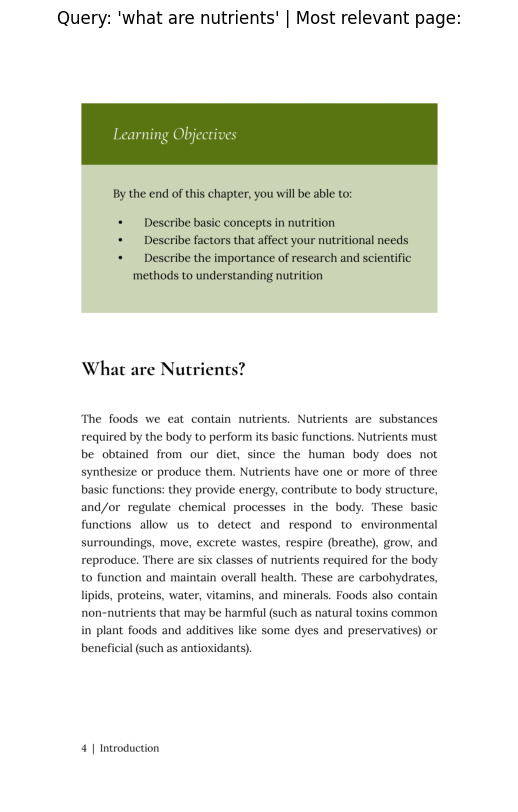

In [51]:
import fitz  # fitz is pymupdf library

#open PDF and load target
pdf_path = "human-nutrition-text.pdf"
doc = fitz.open(pdf_path)
page = doc.load_page(4+41) # note: page no. of our PDF start from 41+

#Get the image of the page
img = page.get_pixmap(dpi=300)


# Save image(optional)
# img.save("output_filename.png")
doc.close()

#convert the pixmap to numpy array
img_array = np.frombuffer(img.samples_mv,
                          dtype=np.uint8).reshape((img.h, img.w, img.n))

#Display the image using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
plt.imshow(img_array)
plt.title(f"Query: '{query}' | Most relevant page:")
plt.axis("off")
plt.show()

###Similarity measures: dot product and cosine similarity

Two of the most common similarities measures between vectors are dot product and cosine similarity.

In essence, closer vectors will have higher scores, further away vectors will have lower scores.


In [53]:
embeddings[0]

tensor([ 6.7424e-02,  9.0228e-02, -5.0955e-03, -3.1755e-02,  7.3908e-02,
         3.5198e-02, -1.9799e-02,  4.6769e-02,  5.3573e-02,  5.0123e-03,
         3.3393e-02, -1.6222e-03,  1.7608e-02,  3.6265e-02, -3.1677e-04,
        -1.0712e-02,  1.5426e-02,  2.6218e-02,  2.7766e-03,  3.6494e-02,
        -4.4411e-02,  1.8936e-02,  4.9012e-02,  1.6402e-02, -4.8578e-02,
         3.1828e-03,  2.7299e-02, -2.0475e-03, -1.2283e-02, -7.2805e-02,
         1.2045e-02,  1.0730e-02,  2.1000e-03, -8.1777e-02,  2.6783e-06,
        -1.8143e-02, -1.2080e-02,  2.4717e-02, -6.2747e-02,  7.3544e-02,
         2.2162e-02, -3.2877e-02, -1.8009e-02,  2.2295e-02,  5.6136e-02,
         1.7951e-03,  5.2593e-02, -3.3174e-03, -8.3387e-03, -1.0629e-02,
         2.3192e-03, -2.2393e-02, -1.5301e-02, -9.9306e-03,  4.6532e-02,
         3.5747e-02, -2.5476e-02,  2.6370e-02,  3.7491e-03, -3.8268e-02,
         2.5833e-02,  4.1287e-02,  2.5818e-02,  3.3297e-02, -2.5178e-02,
         4.5152e-02,  4.4898e-04, -9.9662e-02,  4.9

In [59]:
"""
simple example on cosine similarity and dot product
here we need high similarity between vec1 and vec2 as they are same or similar
"""

import torch

def dot_product(vector1, vector2):
  return torch.dot(vector1, vector2)

def cosine_similarity(vector1, vector2):
  dot_product = torch.dot(vector1, vector2)

  # get euclidian norm/ l2 norm
  norm_vector1 = torch.sqrt(torch.sum(vector1**2))
  norm_vector2 = torch.sqrt(torch.sum(vector2**2))
  return dot_product / (norm_vector1 * norm_vector2)

# Example vectors/tensors
vector1 = torch.tensor([1,2,3], dtype=torch.float32)
vector2 = torch.tensor([1,2,3], dtype=torch.float32)
vector3 = torch.tensor([4,5,6], dtype=torch.float32)
vector4 = torch.tensor([-1,-2,-3], dtype=torch.float32)

#calculate dot product
print("Dot product between vector1 and vector2:", dot_product(vector1, vector2))
print("Dot product between vector1 and vector3:", dot_product(vector1, vector3))
print("Dot product between vector1 and vector4:", dot_product(vector1, vector4))

#cosine similarity
print("Dot product between vector1 and vector2:", cosine_similarity(vector1, vector2))
print("Dot product between vector1 and vector3:", cosine_similarity(vector1, vector3))
print("Dot product between vector1 and vector4:", cosine_similarity(vector1, vector4))


Dot product between vector1 and vector2: tensor(14.)
Dot product between vector1 and vector3: tensor(32.)
Dot product between vector1 and vector4: tensor(-14.)
Dot product between vector1 and vector2: tensor(1.0000)
Dot product between vector1 and vector3: tensor(0.9746)
Dot product between vector1 and vector4: tensor(-1.0000)



"""
outouts from our model are already normalized. Always check this, if normalization is required?
"""


###Functionizing our semantic search pipeline

Now putting all the steps from above for semantic search into a function two so we can repeat the worlflow

In [67]:
def retrieve_relevant_resources(query: str,
                                embeddings: torch.tensor,
                                model: SentenceTransformer=embedding_model,
                                n_resources_to_return: int=5,
                                print_time: bool=True):

  """
  Embeds a query with model and returns top k scores and indices from embeddings.
  """

  #embed the query
  query_embedding = model.encode(query, convert_to_tensor=True)

  #Get dot product scores on embeddings
  start_time = timer()
  dot_scores = util.dot_score(query_embedding, embeddings)[0]
  end_time = timer()

  if print_time:
    print(f"[INFO] time taken to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

  scores, indices = torch.topk(input=dot_scores,
                             k=n_resources_to_return)


  return scores, indices


def print_top_results_and_scores(query: str,
                                 embeddings: torch.tensor,
                                 pages_and_chunks: list[dict]=pages_and_chunks,
                                 n_resources_to_return: int=5):
  """
  Finds relevant passages given a query and prints them out along with their scores.
  """

  scores, indices = retrieve_relevant_resources(query=query,
                                                embeddings=embeddings,
                                                n_resources_to_return=n_resources_to_return)

  # Loop through zipped together scores and indices from torch.topk
  for score, idx in zip(scores, indices):
    print(f"score: {score:.4f}")
    print("Text:")
    print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
    print(f"Page number: {pages_and_chunks[idx]['page_number']}")
    print("\n")

In [70]:
query = "foods high on fiber"
# retrieve_relevant_resources(query=query, embeddings=embeddings)
print_top_results_and_scores(query=query, embeddings=embeddings)

[INFO] time taken to get scores on 1680 embeddings: 0.00066 seconds.
score: 0.6965
Text:
• Change it up a bit and experience the taste and satisfaction of other whole
grains such as barley, quinoa, and bulgur. • Eat snacks high in fiber, such as
almonds, pistachios, raisins, and air-popped popcorn. Add an artichoke and green
peas to your dinner plate more 276 | Carbohydrates and Personal Diet Choices
Page number: 276


score: 0.6540
Text:
Dietary fiber is categorized as either water-soluble or insoluble. Some examples
of soluble fibers are inulin, pectin, and guar gum and they are found in peas,
beans, oats, barley, and rye. Cellulose and lignin are insoluble fibers and a
few dietary sources of them are whole-grain foods, flax, cauliflower, and
avocados. Cellulose is the most abundant fiber in plants, making up the cell
walls and providing structure. Soluble fibers are more easily accessible to
bacterial enzymes in the large intestine so they can be broken down to a greater
extent than

###Getting an LLM for local generation

We want to focus on local generation. However, we are going to work with an LLM API.

Which LLM to use?
Answer depends on:
1. Do we want to run locally?
2. If yes, then how much power (VRAM available) can we provide to the model?

What is an LLM?

Goes grom text input => generate text output.


### Checking our local GPU memory availability

In [77]:
#get GPU available memory

# import torch

# gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory
# gpu_memory_gb = round(gpu_memory_bytes / (2**30))
# print(f"Available GPU memory: {gpu_memory_gb} GB")


NOTE: to download models and run locally form Hugging Face, we need t sign in to Hugging Face CLI.
https://huggingface.co/docs/huggingface_hub/en/guides/cli

using google's LLM model gemma-7b-it from hugging face: https://huggingface.co/google/gemma-7b-it


it stands for "instruction tuned".

IT: The "IT" suffix often stands for "Instruction Tuned." This means that the model has undergone additional training to improve its ability to follow instructions and provide relevant and accurate responses in a conversational setting.

### to run locally
#### !pip install "huggingface_hub[cli]"
""" and then in terminal write:
huggingface-cli login

"""